In [4]:
import pandas as pd
file_data = pd.read_csv('./dataset/file_data.csv')
file_data['가격'] = [5000,5000,4000,5000,3000]
file_data

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000


In [5]:
df1 = file_data.copy()
df1
df2 = pd.DataFrame({
    '차림표':['비빔밥','돈까스','라면','김밥','제육덮밥'],
    '가격':[7000, 8000, 3000, 3000,9000]
})
df2

,차림표,가격
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [6]:
# 병합 - 세로방향
dfc1 = pd.concat([df1,df2])
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [8]:
#  병합 - 가로방향
dfc2 = pd.concat([df1,df2],axis=1)
dfc2

,차림표,가격,차림표,가격
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [9]:
new_columns = ['메뉴1','가격1','메뉴2','가격2']
dfc2.columns = new_columns
dfc2

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [10]:
dfc2[['메뉴1','가격2']]

,메뉴1,가격2
0,냉면,7000
1,칼국수,8000
2,잔치국수,3000
3,수제비,3000
4,우동,9000


In [11]:
sr1 = dfc2['메뉴1']
sr2 = dfc2['가격2']
print(sr1,'\n')
print(sr2)

0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

0    7000
1    8000
2    3000
3    3000
4    9000
Name: 가격2, dtype: int64


In [12]:
# 시리즈 -> 데이터프레임
df = pd.concat([sr1,sr2],axis=1)
df

,메뉴1,가격2
0,냉면,7000
1,칼국수,8000
2,잔치국수,3000
3,수제비,3000
4,우동,9000


In [13]:
#열 삭제, inplace = True는 원본에 반영함을 의미
dfc3 = dfc2.copy()
# dfc3.drop('가격1',axis=1,inplace = True)
dfc3.drop(['가격1','가격2'], axis=1,inplace = True)
dfc3

,메뉴1,메뉴2
0,냉면,비빔밥
1,칼국수,돈까스
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [14]:
#행 삭제
dfc3.drop([0,1],axis=0,inplace=True)
dfc3

,메뉴1,메뉴2
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [15]:
dfc3 = dfc2.copy()
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [16]:
# 조건에 맞는 데이터 추출 - 불린인덱싱
dfc3.loc[(dfc3['가격1'] > 4000) & (dfc3['가격2'] > 4000), :] 

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000


In [17]:
# 행 추가
dfc3.loc[5] = ['김치라면', '4000', '만두', '5000']
dfc3


,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000
5,김치라면,4000,만두,5000


In [18]:
# 열 추가
dfc3['메뉴3'] = dfc3.메뉴2
dfc3

,메뉴1,가격1,메뉴2,가격2,메뉴3
0,냉면,5000,비빔밥,7000,비빔밥
1,칼국수,5000,돈까스,8000,돈까스
2,잔치국수,4000,라면,3000,라면
3,수제비,5000,김밥,3000,김밥
4,우동,3000,제육덮밥,9000,제육덮밥
5,김치라면,4000,만두,5000,만두


In [19]:
# 인덱싱 재정렬
ndf = dfc1.reset_index() 
ndf.drop('index',axis=1,inplace=True)
ndf

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [20]:
ndf1 = ndf.copy()
ndf1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [21]:
#인덱스 설정
import numpy as np
ndf1.index=np.arange(1,11)
ndf1


,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [22]:
# 인덱스 지정한 데로 설정 : reindex
new_index = np.arange(1,15)
ndf2 = ndf1.reindex(new_index,fill_value=0)
ndf2

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [23]:
# 내림차순 정렬
ndf2 = ndf1.sort_index(ascending=False)
ndf2

,차림표,가격
10,제육덮밥,9000
9,김밥,3000
8,라면,3000
7,돈까스,8000
6,비빔밥,7000
5,우동,3000
4,수제비,5000
3,잔치국수,4000
2,칼국수,5000
1,냉면,5000


In [24]:
ndf3 = ndf2.sort_index(ascending=True)
ndf3

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [25]:
ndf4 = ndf2.sort_values(by = '가격',ascending=False)
ndf4

,차림표,가격
10,제육덮밥,9000
7,돈까스,8000
6,비빔밥,7000
4,수제비,5000
2,칼국수,5000
1,냉면,5000
3,잔치국수,4000
9,김밥,3000
8,라면,3000
5,우동,3000


In [14]:
!pip install seaborn

In [26]:
#[과제] 인덱싱을 이용하여 특정 컬럼, 특정 행, 특정 값
print(dfc3.iloc[1],'\n')
print(dfc3.loc[3],'\n')
print(dfc3.iloc[(3,3)])

메뉴1     칼국수
가격1    5000
메뉴2     돈까스
가격2    8000
메뉴3     돈까스
Name: 1, dtype: object 

메뉴1     수제비
가격1    5000
메뉴2      김밥
가격2    3000
메뉴3      김밥
Name: 3, dtype: object 

3000


In [27]:
a = dfc3['메뉴1']
b = dfc3[1:4]
c = dfc3[['가격1','가격2']]
# 행 인덱싱
x = dfc3.loc[1]
y = dfc3.iloc[1,1]
z = dfc3.loc[dfc3['가격2']==3000,['메뉴2','가격2']]
print(a,'\n')
print(b,'\n')
print(c,'\n')

print(x,'\n')
print(y,'\n')
print(z)


0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
5    김치라면
Name: 메뉴1, dtype: object 

    메뉴1   가격1  메뉴2   가격2  메뉴3
1   칼국수  5000  돈까스  8000  돈까스
2  잔치국수  4000   라면  3000   라면
3   수제비  5000   김밥  3000   김밥 

    가격1   가격2
0  5000  7000
1  5000  8000
2  4000  3000
3  5000  3000
4  3000  9000
5  4000  5000 

메뉴1     칼국수
가격1    5000
메뉴2     돈까스
가격2    8000
메뉴3     돈까스
Name: 1, dtype: object 

5000 

  메뉴2   가격2
2  라면  3000
3  김밥  3000


In [30]:
#[과제] 행, 열 모두에 조건 지정
dfc3 = dfc2.copy()
dfc3.loc[(dfc3['가격1'] > 4500) & (dfc3['메뉴1'].str.contains('국수')), ['메뉴1','가격1']]
dfc3.loc[(dfc3['가격2']>4000) & (dfc3.메뉴2!='돈까스'), ['메뉴2', '가격2']]


,메뉴2,가격2
0,비빔밥,7000
4,제육덮밥,9000


In [47]:
import numpy as np
columns = ['kor','eng','art','math','gym','sci']
index = ['jim','sam','tom','tim','bob']
data = np.random.randint(70,100,size=(5,6))
df = pd.DataFrame(data,index,columns=columns)
df

,kor,eng,art,math,gym,sci
jim,80,74,70,77,88,70
sam,77,78,90,92,70,79
tom,99,82,80,94,75,82
tim,78,76,80,70,71,83
bob,74,93,91,99,90,83


In [99]:
# [과제] iloc, loc를 이용해서 아래 요구사항들을 출력하세요

# df의 kor열을 series와 dataframe을 각각 출력
# df에서 sam의 math 점수를 출력(2가지 방법)
# df에서 tom의 eng와 sci 점수를 출력(2가지 방법)
# df에서 jim, tim의 eng, gym 점수를 출력
# df에서 jim, sam의 art,math,gym 점수를 출력


In [35]:
import pandas as pd
a1=df['kor']
print(a1,type(a1),'\n')
a2=df[['kor']]
print(a2,type(a2),'\n')
print(df.iloc[1,3])
print(df.loc['sam','math'],'\n')
print(df.iloc[2,[1,5]])
print(df.loc['tom',['eng','sci']],'\n')
print(df.iloc[[0,3],[1,4]])
print(df.loc[['jim','tim'],['eng','gym']],'\n')
print(df.iloc[[0,1],[2,3,4]])
print(df.loc[['jim','sam'],['art','math','gym']])

jim    96
sam    86
tom    99
tim    92
bob    87
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 

     kor
jim   96
sam   86
tom   99
tim   92
bob   87 <class 'pandas.core.frame.DataFrame'> 

82
82 

eng    72
sci    72
Name: tom, dtype: int32
eng    72
sci    72
Name: tom, dtype: int32 

     eng  gym
jim   88   80
tim   89   81
     eng  gym
jim   88   80
tim   89   81 

     art  math  gym
jim   91    74   80
sam   73    82   93
     art  math  gym
jim   91    74   80
sam   73    82   93


In [38]:
x = df.iloc[:,0]
print(x,type(x),'\n')
x1 = df.iloc[:,[0]]
print(x1,type(x1),'\n')
print(df.loc['sam','math'])
print(df.iloc[1,3])

print(df.loc[['tom'],['eng','sci']])

print(df.iloc[[2],[1,5]])
print(df.iloc[[0,3],[1,4]])
print(df.loc['jim':'sam','art':'gym'])
print(df.iloc[0:2,2:5])


jim    96
sam    86
tom    99
tim    92
bob    87
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 

     kor
jim   96
sam   86
tom   99
tim   92
bob   87 <class 'pandas.core.frame.DataFrame'> 

82
82
     eng  sci
tom   72   72
     eng  sci
tom   72   72
     eng  gym
jim   88   80
tim   89   81
     art  math  gym
jim   91    74   80
sam   73    82   93
     art  math  gym
jim   91    74   80
sam   73    82   93


In [142]:
# [과제] iloc, loc를 이용해서 아래 요구사항들을 수행하세요

# df에서 sam의 math 점수를 100으로 변경
# df에서 tom의 eng와 math 점수를 100으로 변경
# df에서 jim, tim의 kor, gym 점수를 null값으로 변경
# df에서 math와 gym 점수를 바꾸어 출력

In [41]:
# df.iloc[1,3] = 100
# df.loc[['tom'],['eng','math']] = 100
# df.iloc[[0,3],[0,4]] = np.nan
# df.iloc[:,[0,1,2,4,3,5]]

In [49]:
df1 = df.copy()
df1.loc['sam','math'] = 100
df1
df2 = df.copy()
df2.loc['tom',['eng','math']] = 100
df2
df3 = df.copy()
df3.loc[['jim','tim'],['kor','gym']] = np.nan
df3
a = ['kor','eng','art','gym','math','sci']
df.columns = a
df
df4 = df.copy()
df.gym=df4.math
df.math=df4.gym
df
df2=df.copy()
df2['tmp']=df2.math
df2.math=df2.gym
df2.gym=df2.tmp
df3=df2.drop('tmp',axis=1)
print(df,'\n\n',df3)


     kor  eng  art  gym  math  sci
jim   80   74   70   77    88   70
sam   77   78   90   92    70   79
tom   99   82   80   94    75   82
tim   78   76   80   70    71   83
bob   74   93   91   99    90   83 

      kor  eng  art  gym  math  sci
jim   80   74   70   88    77   70
sam   77   78   90   70    92   79
tom   99   82   80   75    94   82
tim   78   76   80   71    70   83
bob   74   93   91   90    99   83


In [58]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 데이터프레임의 모든 데이터를 보기 위한 코드

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None


In [59]:
#[과제] 데이터 추출, 변경, 삭제, 정렬, 칼럼 병합(sibsp + parch = family) 등을 수행하여 데이터에서 인사이트를 찾아보세요.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = df.iloc[[1,5,8,3],:]
df1.loc[5,'age'] = 40
df1.drop([5],axis = 0, inplace =True)
df2 = df1.sort_index(ascending=True)
df2['family'] = df[['sibsp','parch']].sum()
df2.value_counts(['pclass'])


pclass
1         2
3         1
dtype: int64

In [173]:
import numpy as np
import pandas as pd
data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data,columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [78]:
# 삭제
df1 = df.copy()
# df1.drop(0)
df1.drop(df1.index[[0,3]])

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [79]:
# 특정 조건에 맞는 인덱스
df1 = df.copy()
idx = df1[df1.a > 5].index
idx

Int64Index([2, 3], dtype='int64')

In [80]:
df1 = df.copy()
idx = df1[df1.a > 5].index
df.drop(idx)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9


In [87]:
li = []
for i in range(0,100):
    li.append('c'+str(i+1))
print(li)

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100']


In [148]:
data = np.random.randn(10000).reshape(100,100)
df = pd.DataFrame(data,columns = li)
df['c2'] = df.c2 * 100
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-0.434108,70.280292,-0.622891,0.974727,-0.091496,-1.479345,0.670032,-0.394425,0.016557,1.087274,...,-0.842375,0.114186,0.738332,-0.364984,-0.307066,1.731638,-0.446056,0.317290,-0.414545,0.160882
1,-0.794621,-270.639089,2.898808,0.794528,-0.219566,0.765470,0.667920,-1.124818,0.858125,0.471045,...,1.346228,1.410391,-0.249454,0.611149,-0.761151,-0.491694,1.376353,-0.765362,0.607982,0.520955
2,1.470255,-15.189736,-0.110748,-0.443014,0.281031,0.033410,-0.084848,0.166081,0.795786,-1.693492,...,-0.067193,0.962665,-0.993967,-0.020143,0.215365,0.520259,0.644011,-0.065346,0.014587,0.076571
3,0.930886,-15.453608,0.089947,0.767041,1.103392,-0.753165,0.144101,-0.732072,-1.438932,-0.328932,...,1.216661,-0.503565,-1.261928,-0.995594,0.539146,0.904421,-0.490702,-1.138331,-0.806801,-1.797188
4,0.888309,33.485065,-1.851216,0.729274,0.079826,0.580912,-0.100299,0.910753,-2.350769,-0.929822,...,-0.034421,-0.948784,-0.045820,0.802226,0.601410,0.503709,0.367989,-1.280860,-0.260722,-1.004083


In [149]:
df1 = df.copy()
idx = df1[df1.c2 > 10].index
print(idx)

Int64Index([ 0,  4,  6, 11, 13, 15, 16, 17, 19, 21, 25, 26, 28, 29, 30, 31, 33,
            34, 36, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 54, 55, 57, 60,
            66, 73, 75, 77, 79, 80, 82, 83, 84, 86, 90, 91, 92, 96, 97],
           dtype='int64')


In [150]:
df1.drop(idx).head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
1,-0.794621,-270.639089,2.898808,0.794528,-0.219566,0.765470,0.667920,-1.124818,0.858125,0.471045,...,1.346228,1.410391,-0.249454,0.611149,-0.761151,-0.491694,1.376353,-0.765362,0.607982,0.520955
2,1.470255,-15.189736,-0.110748,-0.443014,0.281031,0.033410,-0.084848,0.166081,0.795786,-1.693492,...,-0.067193,0.962665,-0.993967,-0.020143,0.215365,0.520259,0.644011,-0.065346,0.014587,0.076571
3,0.930886,-15.453608,0.089947,0.767041,1.103392,-0.753165,0.144101,-0.732072,-1.438932,-0.328932,...,1.216661,-0.503565,-1.261928,-0.995594,0.539146,0.904421,-0.490702,-1.138331,-0.806801,-1.797188
5,-0.443041,-25.709962,0.914586,0.184649,-2.301009,-0.495098,0.554103,0.949977,0.792936,1.302533,...,-0.195640,0.298795,-0.038448,-0.267596,-0.419828,-1.434430,-2.039554,0.234553,-0.971151,1.075626
7,-0.841700,7.515348,0.427548,-0.618351,-0.609755,-0.769124,1.654877,1.048866,-0.725114,-1.438910,...,-1.508823,-1.246130,-0.841525,1.375841,-0.713383,-0.479321,1.716181,1.104307,1.500623,0.566615


In [151]:
df1 =  df.copy()
idx = df1.query('c2 > 10').index
print(idx)

Int64Index([ 0,  4,  6, 11, 13, 15, 16, 17, 19, 21, 25, 26, 28, 29, 30, 31, 33,
            34, 36, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 54, 55, 57, 60,
            66, 73, 75, 77, 79, 80, 82, 83, 84, 86, 90, 91, 92, 96, 97],
           dtype='int64')


In [152]:
df1 = df.copy()
cond1 = df1.c2 > 10 
cond2 = df1.c3 > 0
cond3 = df.c4 < 0

df2 = df1[cond1 & cond2 & cond3]
df2.shape

(14, 100)

In [100]:
df3 = df1[cond1 | cond2 | cond3]
df3.shape

(86, 100)

In [102]:
df1[cond1][['c1','c2']].head()

,c1,c2
0,-1.394484,37.872649
2,-0.943112,63.344380
4,0.442683,87.168748
6,-0.766509,107.250414
8,2.199899,131.672642


In [176]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
# 컬럼이름 변경
tdf.rename(columns = {'sex':'gender','fare':'ticket'}, inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
tdf.gender.value_counts()
tdf.gender.unique()

array(['male', 'female'], dtype=object)

In [111]:
# 값 변경
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [113]:
# 컬럼 이름을 대문자로
tdf.rename(str.upper, axis = 'columns',inplace = True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [146]:
#칼럼 소문자
tdf.rename(str.lower, axis = 'columns', inplace = True)
tdf.head()

,age,fare,age_category
0,22,7,Young Adult
1,38,71,Adult
2,26,7,Young Adult
3,35,53,Young Adult
4,35,8,Young Adult


In [115]:
# 칼럼 순서 변경
columns_customed = ['pclass','gender','age','survived']
tdf[columns_customed].head()

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [118]:
# NaN 으로 변경
df1 = df.copy()
df1['sex'] = df1.sex.replace('male', np.nan)
df1.sex.value_counts()

female    314
Name: sex, dtype: int64

In [119]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [120]:
tdf.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [123]:
tdf.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [126]:
# 결측값 대체  : age 평균값
tdf = df.copy()
print(tdf.age.isnull().sum(),'\n')
tdf.age.fillna(tdf.age.mean(),inplace = True)
tdf.age.isnull().sum()

177 



0

In [128]:
tdf1 = df.copy()
tdf1.age.replace(np.nan, tdf1.age.mean(), inplace = True)
tdf1.age.isnull().sum()

0

In [129]:
#결측값 삭제
tdf2 = df.copy()
tdf2.dropna(subset=['age'],inplace = True)
print(len(tdf2),'\n')
tdf2.age.isnull().sum()

714 



0

In [134]:
tdf[['age','fare']].head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [137]:
# 실수를 정수로 변환하여 출력
tdf[['age','fare']].astype('int').head()

,age,fare
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [142]:
tdf1 = tdf[['age','fare']].astype({'age' : 'int', 'fare' : 'int'})
tdf1.head()

,age,fare
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [143]:
# age 칼럼의 값 구성 체크
tdf.age.value_counts()

29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: age, Length: 71, dtype: int64

In [144]:
# age 칼럼의 고유 구성 요소
tdf.age.unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [155]:
# age 칼럼의 범주화
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 19 : cat = 'Teenager'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat
tdf['age_category'] = tdf.age.apply(lambda x : get_category(x))
tdf[['age','age_category']].head()

,age,age_category
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [163]:
# 인코딩 : 문자를 숫자로 변환
tdf = df.copy()
df1 = tdf[['sex','class']]
df1.head()

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


In [164]:
df1.value_counts('class')

class
2    491
0    216
1    184
dtype: int64

In [159]:
!pip install scikit-learn

In [165]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['sex','class']
for feature in features:
    df1[feature] = le.fit_transform(df[feature])
df1.head()

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


In [177]:
tdf = df.copy()
df1 = tdf[['sex','class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [181]:
from sklearn.preprocessing import OneHotEncoder

items = list(df1.sex)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(oh_labels.toarray(), oh_labels.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [183]:
pd.get_dummies(df1).head()

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [185]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [191]:
df_org =  pd.DataFrame(boston.data, columns = [boston.feature_names])
df_org['target'] = boston.target
df_org.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
df = df_org[['INDUS','RM','PTRATIO','LSTAT','target']]
df.head()

NameError: name 'df_org' is not defined

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


In [193]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['RM'] = scaler.fit_transform(df.RM)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,0.577505,15.3,4.98,24.0
1,7.07,0.547998,17.8,9.14,21.6
2,7.07,0.694386,17.8,4.03,34.7
3,2.18,0.658555,18.7,2.94,33.4
4,2.18,0.687105,18.7,5.33,36.2


In [194]:
scaler = MinMaxScaler()
df['INDUS'] = scaler.fit_transform(df.INDUS)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,15.3,4.98,24.0
1,0.242302,0.547998,17.8,9.14,21.6
2,0.242302,0.694386,17.8,4.03,34.7
3,0.063050,0.658555,18.7,2.94,33.4
4,0.063050,0.687105,18.7,5.33,36.2


In [195]:
li = ['INDUS','RM','PTRATIO','LSTAT','target']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[i])
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [196]:
df.corr()

,INDUS,RM,PTRATIO,LSTAT,target
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
target,-0.483725,0.695360,-0.507787,-0.737663,1.000000


In [197]:
!pip install matplotlib

<module 'seaborn' from 'C:\\Users\\admin\\Anaconda3\\envs\\cakd5\\lib\\site-packages\\seaborn\\__init__.py'>

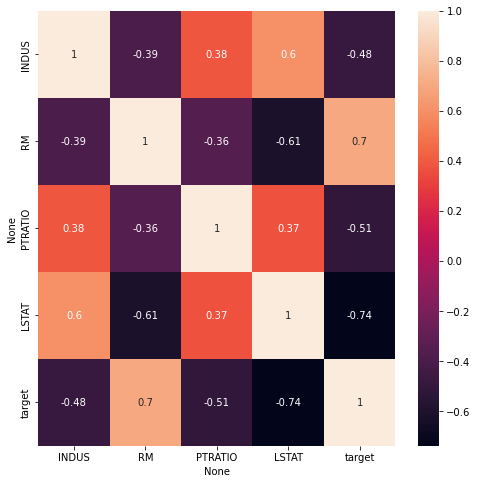

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True)
sns

<AxesSubplot:ylabel='Density'>

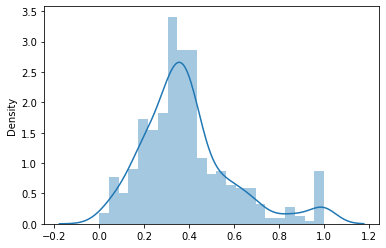

In [200]:
sns.distplot(df[['target']])

<AxesSubplot:ylabel='Density'>

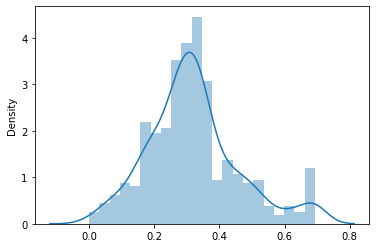

In [201]:
# 로그 변환
import numpy as np
df['target'] = np.log1p(df.target)
sns.distplot(df.target)

In [203]:
# 로그 변환 환원
df['target'] =np.expm1(df.target)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.525347
1,0.242302,0.547998,0.553191,0.204470,0.446127
2,0.242302,0.694386,0.553191,0.063466,0.934792
3,0.063050,0.658555,0.648936,0.033389,0.879698
4,0.063050,0.687105,0.648936,0.099338,1.000372


In [204]:
# 결합
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=['a','b','c','d','e'])
df2 = pd.DataFrame(data2, columns=['d','e','h','i'])
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [211]:
# 열방향 결합
a = pd.concat([df1,df2],axis=1)
a

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [212]:
# 행방향 결합
a = pd.concat([df1,df2],axis = 0)
a

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [213]:
c = pd.concat([df1,df2],axis = 0,ignore_index = True)
c

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [215]:
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [216]:
df2

,d,e,h,i
0,11,12,13,14
1,15,16,17,18
2,19,20,21,22
3,23,24,25,26
4,27,28,29,30


In [217]:
# 교집합
df1.join(df2,lsuffix='_a',rsuffix='_b') #,how = 'inner' 쓰는것과 같음

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [218]:
# 합집합
df1.join(df2,lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [220]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_a',rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [222]:
pd.merge(df1,df2,on = 'ind',how = 'inner') # 합집합은 how = 'outer'

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [209]:
# [과제] mtcars.csv 를 불러와서 0~1 스케일로 정규화한 후 qsec 컬럼이 0.5보다 큰 관측치의 개수를 구하시오.

In [2]:
import pandas as pd
df = pd.read_csv('./dataset/mtcars.csv',index_col = 0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
from sklearn.preprocessing import MinMaxScaler
li = ['qsec']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])
print(len(df.loc[df['qsec']>0.5,['qsec']]))

9


In [26]:
file_data = pd.read_csv("./dataset/mtcars.csv")
file_data=pd.DataFrame(file_data)
scaler = MinMaxScaler()
li =['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','am', 'gear', 'carb'] #스케일러 변수로 시리즈(1D)는 에러를 발생시킴

for i in li:
    file_data[i] = scaler.fit_transform(file_data[[i]])        #   fit_transform method expects 2D array

len(file_data.loc[file_data['qsec']>0.5,['qsec']])


9

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./dataset/mtcars.csv',index_col=0)
li = ['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])

print(len(df.loc[df['qsec']>0.5,['qsec']]))

9


In [29]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./dataset/mtcars.csv', index_col = 0)
print(df.head(),type(df),'\n')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(type(scaled))
df = pd.DataFrame(scaled,columns = df.columns)
print(len(df.loc[df['qsec']>0.5,['qsec']]))

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2   <class 'pandas.core.frame.DataFrame'> 

<class 'numpy.ndarray'>
9


In [41]:
#pandas 파일 읽고 저장
#csv 파일 읽고 저장
ar1 = np.arange(10)
li1 = ar1.reshape(2,5)
df = pd.DataFrame(li1,columns = ['c0','c1','c2','c3','c4'])
df.to_csv('./dataset/read_csv_sample.csv', index = False)
# df.to_csv('./dataset/read_csv_sample.csv')

In [42]:
df1 = pd.read_csv('./dataset/read_csv_sample.csv')
# df1 = pd.read_csv('./dataset/read_csv_sample.csv', index_col = 0)
df1

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [44]:
#  header = None 옵션 (데이터셋에 헤더가 없는 경우)
df1 = pd.read_csv('./dataset/read_csv_sample.csv',header = None)
df1

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [46]:
# Json 파일 읽고 쓰기
df1.to_json('./dataset/df_j.json')
df_j = pd.read_json('./dataset/df_j.json')
df_j

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [47]:
# 바이너리 파일로 읽고 쓰기
df1.to_pickle('./dataset/df2.pkl')
df2 = pd.read_pickle('./dataset/df2.pkl')
df2

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [48]:
#파이썬 외장함수(pickle)
import pickle
f = open('./dataset/test.txt','wb')
data = {1:'python',2:'you need'}
pickle.dump(data,f)
f.close()

In [49]:
f = open('./dataset/test.txt','rb')
data = pickle.load(f)
print(data)
f.close()

{1: 'python', 2: 'you need'}


In [52]:
!pip install openpyxl

In [55]:
# 엑셀 파일
df_ex = pd.read_excel('./dataset/auto-mpg.xlsx')
df_ex.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [56]:
df_ex.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [59]:
df_ex1 = df_ex[['mpg', 'cylinders', 'horsepower', 'weight']]
df_ex1.to_excel('./dataset/auto-mpg_ex1.xlsx',index =False)
df_ex1 = pd.read_excel('./dataset/auto-mpg_ex1.xlsx')
df_ex1.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


 연산
 - 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
 - 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
 - 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [63]:
st1 = pd.Series({'국어':100,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90,'영어':80})

add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1/st2),2)
print(type(add))
df = pd.concat([add,sub,mul,div],axis = 1)
df

<class 'pandas.core.series.Series'>


,0,1,2,3
국어,190,10,9000,1.11
수학,170,10,7200,1.12
영어,160,0,6400,1.00


In [64]:
st1 = pd.Series({'국어':100,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90,'영어':80})

add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1/st2),2)
result = pd.DataFrame([add,sub,mul,div],index = ['덧셈','뺄셈','곱셈','나눗셈'])
result

,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [65]:
li = list('abcdefg')
li

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [67]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns = list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [68]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns = list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4,5),columns = list('abcde'))

df2.loc[1,'b'] = np.nan
print(df1,'\n')
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [69]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [71]:
df1.add(df2,fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [76]:
# sub(), mul(), div()을 사용하여 df2의 NaN값을 0으로 대체하여 연산을 수행하시오.
a = df1.sub(df2,fill_value = 0)
b = df1.mul(df2,fill_value = 0)
c = df1.div(df2,fill_value = 0)
print(a)
print(b)
print(c)

      a     b     c     d     e
0   0.0   0.0   0.0   0.0  -4.0
1  -1.0   5.0  -1.0  -1.0  -9.0
2  -2.0  -2.0  -2.0  -2.0 -14.0
3 -15.0 -16.0 -17.0 -18.0 -19.0
      a     b      c      d    e
0   0.0   1.0    4.0    9.0  0.0
1  20.0   0.0   42.0   56.0  0.0
2  80.0  99.0  120.0  143.0  0.0
3   0.0   0.0    0.0    0.0  0.0
     a         b         c         d    e
0  NaN  1.000000  1.000000  1.000000  0.0
1  0.8       inf  0.857143  0.875000  0.0
2  0.8  0.818182  0.833333  0.846154  0.0
3  0.0  0.000000  0.000000  0.000000  0.0


In [75]:
display(df1.add(df2,fill_value=0),df1.sub(df2,fill_value=0),
        df1.mul(df2,fill_value=0),df1.div(df2,fill_value=0).round(2))


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


,a,b,c,d,e
0,0.0,0.0,0.0,0.0,-4.0
1,-1.0,5.0,-1.0,-1.0,-9.0
2,-2.0,-2.0,-2.0,-2.0,-14.0
3,-15.0,-16.0,-17.0,-18.0,-19.0


,a,b,c,d,e
0,0.0,1.0,4.0,9.0,0.0
1,20.0,0.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


,a,b,c,d,e
0,NaN,1.00,1.00,1.00,0.0
1,0.8,inf,0.86,0.88,0.0
2,0.8,0.82,0.83,0.85,0.0
3,0.0,0.00,0.00,0.00,0.0


In [77]:
# reindex 경우 fill_value 지정
df1.reindex(columns = df2.columns,fill_value = 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [79]:
# DataFrame과 Series간 연산
df = pd.DataFrame(np.arange(12.).reshape(4,3),columns= list('bde'), index = ['Utah','Ohio','Texas','Oregon'])
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [80]:
series = df.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [81]:
df - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0
